# Chihuahua Overview

In [1]:
from IPython.display import display

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/able_to_work.csv')
del df["Unnamed: 0"]

for element in ['fecha_reporte', 'fecha_evento', 'fecha_de_ultimo_avistamiento','fecha_de_ingreso',  'fecha_de_localizacion','fecha_probable_de_fallecimiento']:
    df[element] = pd.to_datetime(df[element],errors="coerce") # el errors coerce, tomará todos los errores en fechas como NaT, con lo que vemos inconcistencias

/tmp/ipykernel_3667/1460404765.py:1: DtypeWarning: Columns (5,7,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/able_to_work.csv')


In [3]:
chihuahua = df[df["estado"] == "chihuahua"].copy()
chihuahua.T.head()

,55,67,68,71,72,77,78,81,82,85,...,98834,98880,98881,98882,98883,98884,98885,98886,98887,98888
registro_nacional,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,...,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido
fecha_reporte,2010-06-04 12:00:00,2010-07-25 12:00:00,2010-08-18 12:00:00,2010-10-22 12:00:00,2010-10-12 12:00:00,2011-04-05 02:21:00,2009-10-13 02:13:00,2009-11-28 08:21:00,2008-06-02 11:02:00,2008-07-17 12:00:00,...,2017-10-16 11:37:00,2018-01-17 12:17:00,2018-01-17 03:24:00,2018-10-02 09:40:00,2018-10-02 08:26:00,2018-07-03 03:33:00,2018-10-03 05:36:00,2018-03-16 12:29:00,2018-03-17 05:01:00,2018-03-27 11:42:00
fecha_evento,2010-05-04 12:00:00,2010-07-24 12:00:00,2010-08-19 12:00:00,2010-04-11 12:00:00,2010-08-12 12:00:00,2011-04-05 12:00:00,2009-05-10 12:00:00,2009-11-25 12:00:00,2008-01-31 12:00:00,2008-02-05 12:00:00,...,2010-01-06 12:00:00,2018-01-14 05:00:00,2018-01-16 12:00:00,2018-10-02 08:00:00,2018-08-02 04:00:00,2018-04-03 06:00:00,2018-09-03 04:30:00,2018-11-03 12:00:00,2018-11-03 03:00:00,2018-03-17 11:00:00
estado,chihuahua,chihuahua,chihuahua,chihuahua,chihuahua,chihuahua,chihuahua,chihuahua,chihuahua,chihuahua,...,chihuahua,chihuahua,chihuahua,chihuahua,chihuahua,chihuahua,chihuahua,chihuahua,chihuahua,chihuahua
clave_estado,8,8,8,8,8,8,8,8,8,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
chihuahua['year_reporte'] = chihuahua['fecha_reporte'].dt.year
chihuahua["dias_de_busqueda_reporte"] = chihuahua["fecha_de_localizacion"] - chihuahua["fecha_reporte"]
chihuahua["dias_de_busqueda_evento"] = chihuahua["fecha_de_localizacion"] - chihuahua["fecha_evento"]
chihuahua.rename(columns = {"estado_(localizado)" : "estado_localizado"}, inplace = True)
chihuahua[["year_reporte", "dias_de_busqueda_reporte","dias_de_busqueda_evento","estado_localizado"]].head()

,year_reporte,dias_de_busqueda_reporte,dias_de_busqueda_evento,estado_localizado
55,2010,636 days 00:00:00,667 days 00:00:00,no_especificado
67,2010,NaT,NaT,no_especificado
68,2010,557 days 14:00:00,556 days 14:00:00,chihuahua
71,2010,361 days 14:00:00,555 days 14:00:00,no_especificado
72,2010,0 days 00:00:00,61 days 00:00:00,no_especificado


In [5]:
chihuahua.sexo.value_counts()

masculino    4495
femenino     1341
Name: sexo, dtype: int64

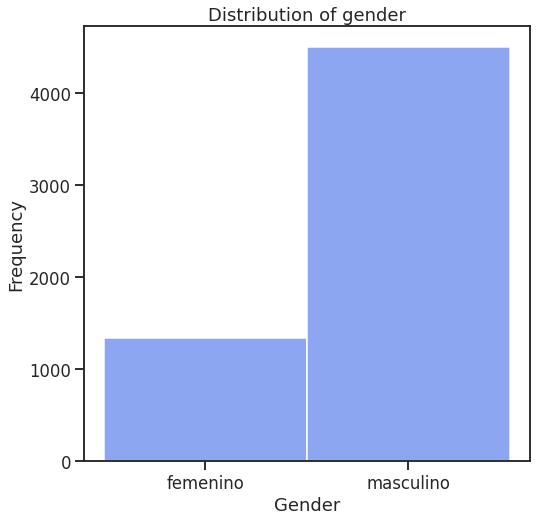

In [6]:
plt.figure(figsize=(8, 8))

sns.set_palette("coolwarm")
sns.set_style("ticks")
sns.set_context("talk")

plt.ylabel('Frequency')
plt.xlabel('Gender')
plt.title('Distribution of gender')

sns.histplot(chihuahua.sexo)
plt.show()

In [7]:
chihuahua.vivo_o_muerto.value_counts()

vivo                 3309
aun_sin_localizar    2189
muerto                338
Name: vivo_o_muerto, dtype: int64

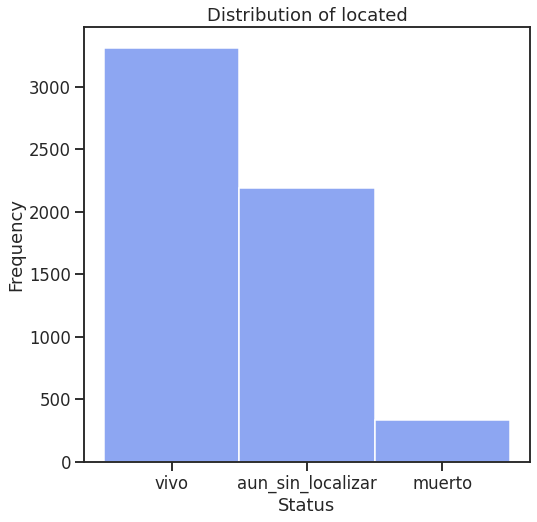

In [8]:
plt.figure(figsize=(8, 8))

sns.set_palette("coolwarm")
sns.set_style("ticks")
sns.set_context("talk")

plt.ylabel('Frequency')
plt.xlabel('Status')
plt.title('Distribution of located')

sns.histplot(chihuahua.vivo_o_muerto)
plt.show()

In [9]:
chihuahua[(chihuahua["sexo"] == "femenino")].vivo_o_muerto.value_counts()

vivo                 1085
aun_sin_localizar     224
muerto                 32
Name: vivo_o_muerto, dtype: int64

In [10]:
chihuahua[(chihuahua["sexo"] == "masculino")].vivo_o_muerto.value_counts()

vivo                 2224
aun_sin_localizar    1965
muerto                306
Name: vivo_o_muerto, dtype: int64

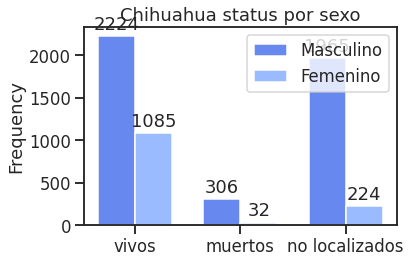

In [11]:
labels = ['vivos', 'muertos', 'no localizados']
men_means = [ 2224,306,1965]
women_means = [1085, 32, 224]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Masculino')
rects2 = ax.bar(x + width/2, women_means, width, label='Femenino')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_title('Chihuahua status por sexo')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [12]:
chihuahua[(chihuahua["sexo"] == "masculino")].posible_causa_desaparicion.value_counts()

sin_dato                                                                                                             200
no_especificado                                                                                                      123
regreso_al_domicilio                                                                                                  71
-1                                                                                                                    57
rebeldia                                                                                                              55
                                                                                                                    ... 
regreso_al_domicilio,_no_dijo_a_donde_se_habia_ido                                                                     1
se_encontraba_en_la_casa_de_unos_tios_solo_dijo_que_en_la_colonia_satelite                                             1
se_encontraba_en_un_anexo_en_la_

In [105]:
chihuahua[(chihuahua["sexo"] == "masculino")].posible_causa_desaparicion.value_counts().head(20)

sin_dato                                                   200
no_especificado                                            123
regreso_al_domicilio                                        71
-1                                                          57
rebeldia                                                    55
vagancia                                                    38
se_encontro_sin_vida                                        23
se_desconoce                                                16
se_encuentra_detenido_en_estados_unidos                     14
otras                                                       13
problemas_familiares                                        12
homicidio                                                   11
interno_en_centro_de_rehabilitacion                          9
se_encuentra_en_un_centro_de_rehabilitacion                  8
se_salio_de_su_casa                                          8
drogadiccion                                           

In [13]:
chihuahua[(chihuahua["sexo"] == "femenino")].posible_causa_desaparicion.value_counts()

rebeldia                    605
disfuncion_familiar          74
no_especificado              55
otro                         45
se_fue_con_su_pareja         38
                           ... 
salio_de_su_domicilio         1
estaba_con_sus_amigas         1
separacion_del_concubino      1
ahogamiento                   1
esta_con_unos_amigos          1
Name: posible_causa_desaparicion, Length: 102, dtype: int64

In [106]:
chihuahua[(chihuahua["sexo"] == "femenino")].posible_causa_desaparicion.value_counts().head(20)

rebeldia                      605
disfuncion_familiar            74
no_especificado                55
otro                           45
se_fue_con_su_pareja           38
otros                          34
evento_social                  21
independizarse                 18
sin_dato                       14
desintegracion                 12
se_fue_con_su_novio            12
se_fue_con_el_novio            12
violencia_familiar             10
se_fue_a_casa_de_una_amiga      9
se_fue_con_una_amiga            8
homicidio                       8
se_desconoce                    6
problemas_familiares            5
salio_con_su_pareja             4
se_fue_a_casa_de_su_novio       4
Name: posible_causa_desaparicion, dtype: int64

In [14]:
chihuahua[(chihuahua["sexo"] == "femenino")].relacion_con_grupos_delictivos.value_counts()

no    1103
si     238
Name: relacion_con_grupos_delictivos, dtype: int64

In [15]:
chihuahua[(chihuahua["sexo"] == "masculino")].relacion_con_grupos_delictivos.value_counts()

no    3720
si     775
Name: relacion_con_grupos_delictivos, dtype: int64

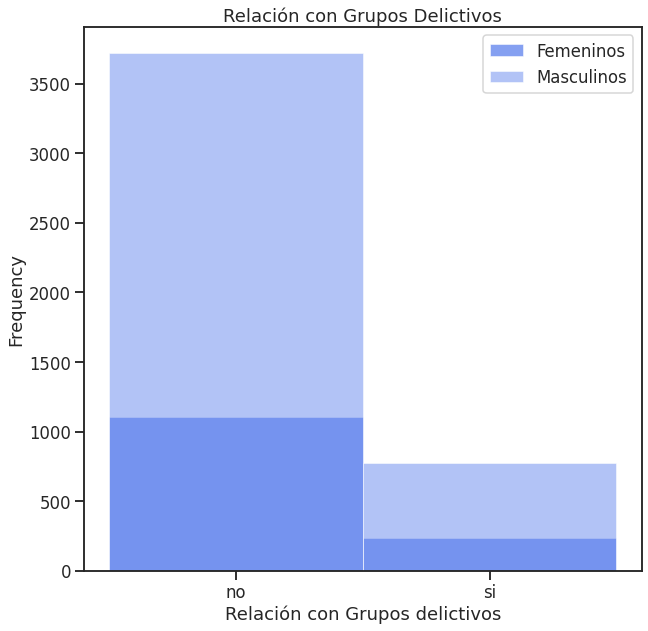

In [16]:
plt.figure(figsize=(10,10))

sns.set_palette("coolwarm")
sns.set_style("ticks")
sns.set_context("talk")

sns.histplot(chihuahua[(chihuahua["sexo"] == "femenino")].relacion_con_grupos_delictivos, label='Femeninos', alpha=0.8,linewidth=.5)
sns.histplot(chihuahua[(chihuahua["sexo"] == "masculino")].relacion_con_grupos_delictivos, label='Masculinos', alpha=0.5,linewidth=.5)#4361ee

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Relación con Grupos delictivos')
plt.title('Relación con Grupos Delictivos')

plt.show()

Recordemos los desaparecidos por genero: masculino    4495, femenino     1341  
Si de los masculinos 775 tenian alguna relación con grupos delictivos y si tomamos 4495 como el 100%, entonces, el 17.24% de los hombres desaparecidos contaban con relacion con algún grupo delictivo.  
Si de las femeninas 238 tenian alguna relación con grupos delictivos y si tomamos 1341 como el 100%, entonces, el 17.74% de las mujeres desaparecidas contaban con relación con algún grupo delictivo.  
Si en total tenemos 1013 personas relacionadas con algún grupo delictivo, tomando el total de desaparecidos en Chihuahua(5836), entonces el 17.35% de los desaparecidos en Chihuahua cotaban con relación con algún grupo delictivo.

In [17]:
chihuahua.edad.value_counts()

15.0     404
16.0     381
14.0     297
17.0     288
13.0     242
        ... 
98.0       1
250.0      1
96.0       1
91.0       1
90.0       1
Name: edad, Length: 96, dtype: int64

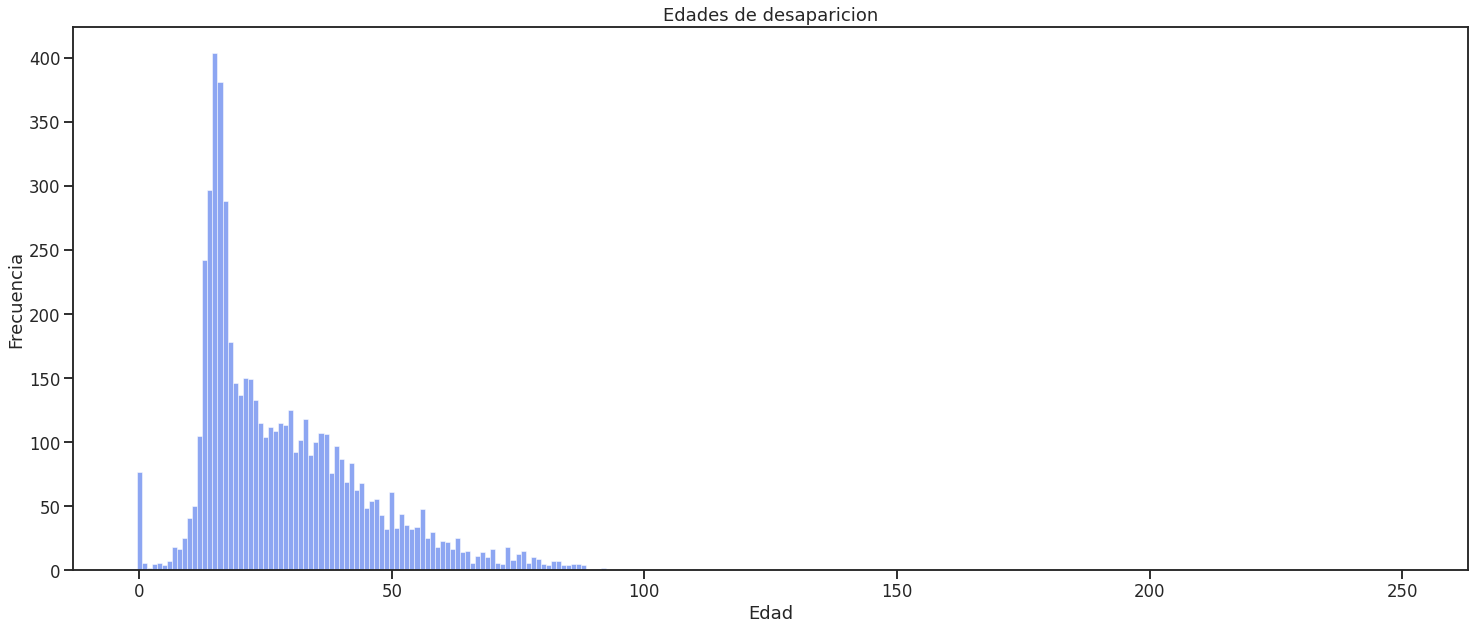

In [18]:
plt.figure(figsize=(25,10))

sns.set_palette("coolwarm")
sns.set_style("ticks")
sns.set_context("talk")


sns.histplot(chihuahua.edad,discrete='True')

plt.title('Edades de desaparicion')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

plt.show()

In [19]:
chihuahua.edad.value_counts().head()

15.0    404
16.0    381
14.0    297
17.0    288
13.0    242
Name: edad, dtype: int64

In [20]:
len(chihuahua[(chihuahua["edad"] == 0.0)])

77

In [21]:
chihuahua.ocupacion.value_counts()

no_especificado             2247
sin_dato                     643
desempleado                  640
empleado_particular          523
estudiante                   472
                            ... 
velador                        1
sexo_servidor_(a)              1
valet_parking                  1
agente_aduanal                 1
piloto_aviador_comercial       1
Name: ocupacion, Length: 70, dtype: int64

In [22]:
chihuahua.ocupacion.value_counts().head(10)

no_especificado        2247
sin_dato                643
desempleado             640
empleado_particular     523
estudiante              472
comerciante             111
subempleado              99
otros                    94
jornalero                88
albañil                  61
Name: ocupacion, dtype: int64

## Analisis acerca de los bebés desaparecidos

In [23]:
chihuahua[(chihuahua["edad"] == 0.0)].year_reporte.value_counts()

2010    27
2014    12
2012     9
2015     9
2008     8
2007     4
2011     4
2009     2
2016     2
Name: year_reporte, dtype: int64

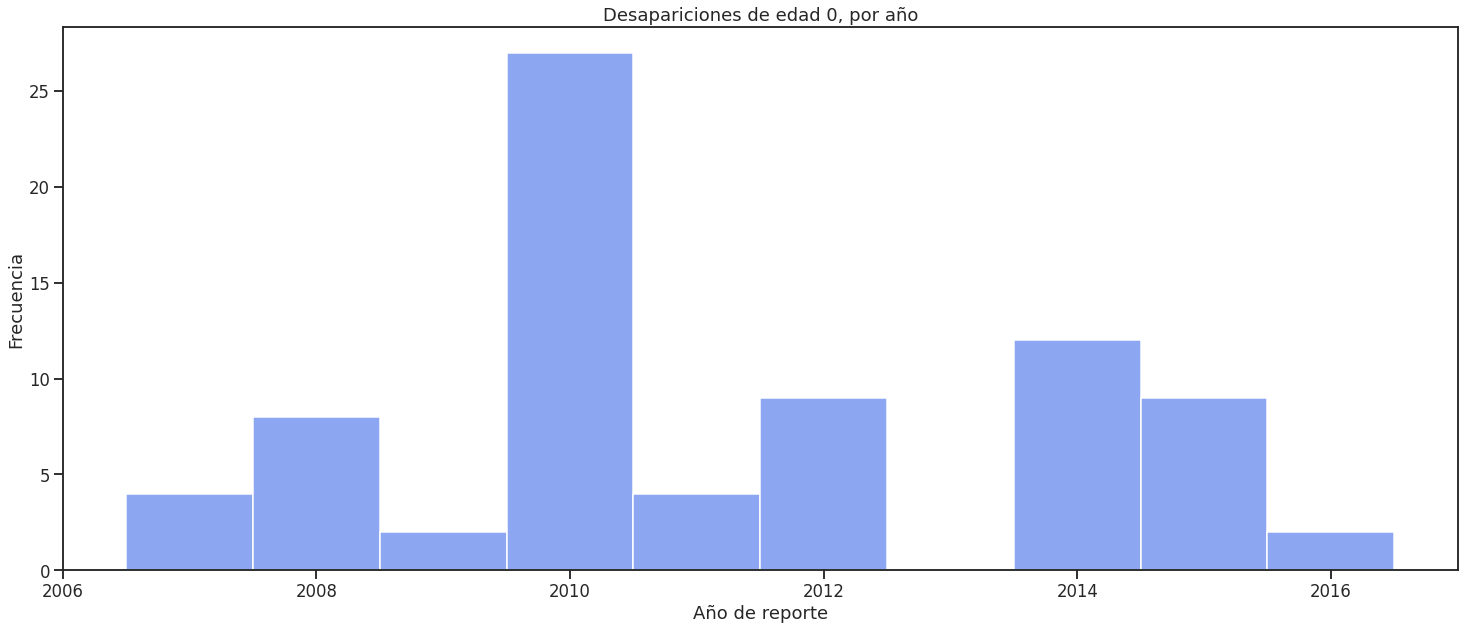

In [24]:
plt.figure(figsize=(25,10))

sns.set_palette("coolwarm")
sns.set_style("ticks")
sns.set_context("talk")


sns.histplot(chihuahua[(chihuahua["edad"] == 0.0)].year_reporte,discrete='True')

plt.title('Desapariciones de edad 0, por año')
plt.xlabel('Año de reporte')
plt.ylabel('Frecuencia')

plt.show()

In [25]:
chihuahua[(chihuahua["edad"] == 0.0)].vivo_o_muerto.value_counts()

aun_sin_localizar    43
vivo                 26
muerto                8
Name: vivo_o_muerto, dtype: int64

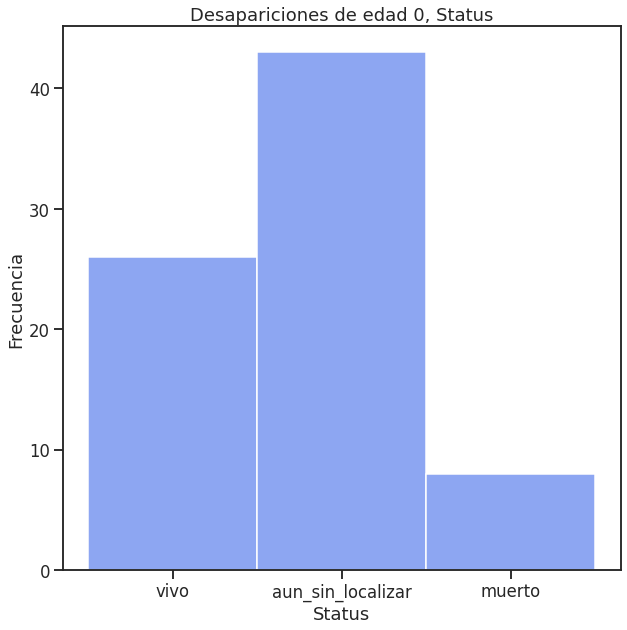

In [26]:
plt.figure(figsize=(10,10))

sns.set_palette("coolwarm")
sns.set_style("ticks")
sns.set_context("talk")


sns.histplot(chihuahua[(chihuahua["edad"] == 0.0)].vivo_o_muerto,discrete='True')

plt.title('Desapariciones de edad 0, Status')
plt.xlabel('Status')
plt.ylabel('Frecuencia')

plt.show()

In [27]:
chihuahua[(chihuahua["edad"] == 0.0) & (chihuahua["vivo_o_muerto"] == "vivo")].estado_localizado.value_counts()

no_especificado    14
chihuahua          11
sinaloa             1
Name: estado_localizado, dtype: int64

In [28]:
chihuahua[(chihuahua["edad"] == 0.0) & (chihuahua["vivo_o_muerto"] == "muerto")].estado_localizado.value_counts()

chihuahua    8
Name: estado_localizado, dtype: int64

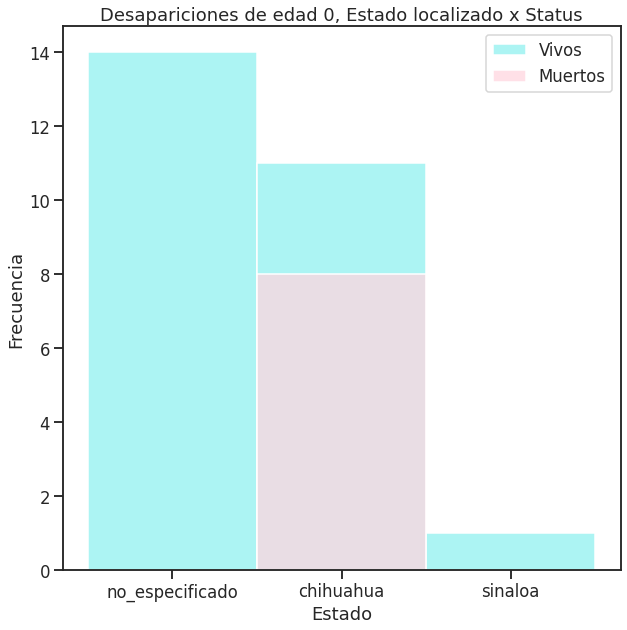

In [29]:
plt.figure(figsize=(10,10))

sns.set_style("ticks")
sns.set_context("talk")


sns.histplot(chihuahua[(chihuahua["edad"] == 0.0) & (chihuahua["vivo_o_muerto"] == "vivo")].estado_localizado,discrete='True',label="Vivos",color="#90f1ef")
sns.histplot(chihuahua[(chihuahua["edad"] == 0.0) & (chihuahua["vivo_o_muerto"] == "muerto")].estado_localizado,discrete='True', label="Muertos",color="#ffd6e0")

plt.legend()

plt.title('Desapariciones de edad 0, Estado localizado x Status')
plt.xlabel('Estado')
plt.ylabel('Frecuencia')

plt.show()

In [30]:
chihuahua[(chihuahua["edad"] == 0.0)].posible_causa_desaparicion.value_counts()

otros                                                               9
disfuncion_familiar                                                 5
homicidio                                                           3
rebeldia                                                            3
evento_social                                                       3
vagancia                                                            2
sin_dato                                                            1
violencia_familiar                                                  1
lo_estaban_extorsionando                                            1
se_quedo_con_una_amiga_sin_avisar                                   1
se_quedo_tomando_bebidas_embriagantes_toda_la_noche_con_un_amigo    1
se_fue_con_unos_amigos                                              1
atencion_medica                                                     1
se_desconoce                                                        1
se_extravio         

In [31]:
chihuahua[(chihuahua["edad"] == 0.0)][["edad","fecha_de_nacimiento","fecha_reporte","posible_causa_desaparicion"]].T

,55,67,68,71,72,89,101,1451,1452,1456,...,63061,63126,65772,66484,66497,67274,74019,74471,85100,91412
edad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fecha_de_nacimiento,01/01/00_0:00,_,01/01/00_0:00,01/01/00_0:00,01/01/00_0:00,_,_,01/01/00_0:00,01/01/00_0:00,01/01/00_0:00,...,01/01/00_0:00,01/01/00_0:00,01/01/00_0:00,15/05/99_0:00,06/09/88_0:00,02/05/16_0:00,01/08/15_0:00,13/07/15_0:00,01/01/00_0:00,01/01/00_0:00
fecha_reporte,2010-06-04 12:00:00,2010-07-25 12:00:00,2010-08-18 12:00:00,2010-10-22 12:00:00,2010-10-12 12:00:00,2008-11-02 12:05:00,2012-01-18 11:09:00,2010-05-14 12:00:00,2010-07-01 12:00:00,2010-07-16 12:00:00,...,2014-02-01 03:08:00,2015-09-18 07:44:00,2016-06-11 05:50:00,2014-11-16 02:38:00,2015-04-16 04:15:00,2016-02-05 12:00:00,2015-10-21 06:39:00,2015-05-25 01:00:00,2015-06-15 04:43:00,2007-08-28 02:00:00
posible_causa_desaparicion,disfuncion_familiar,NaN,homicidio,otros,sin_dato,NaN,NaN,otros,disfuncion_familiar,NaN,...,NaN,rebeldia,NaN,vagancia,NaN,NaN,disfuncion_familiar,evento_social,se_extravio,NaN


Notamos que en los datos hay inconsistencias, en este estado no están marcando adecuadamente las edades de los desaparecidos, tenemos fechas de nacimiento del año 99 u 88 que no coinciden con la edad presentada, es decir, si nació en el 88 (index 66497) y la fecha de reporte es del 2015, esa persona debiera tener 27 años al momento de desaparecer, no 0 como indica el reporte...  
opciones, preguntar a Sofía:
* hacer una columna con la edad calculada a partir de la fecha de nacimiento (si la fecha de nacimiento presenta inconsistencias ?)
* realizar busqueda, si alguno de los datos no coincide, entonces tomamos ese dato como incongruente y se elimina de las desapariciones de 0 años

# Continuamos por edad

In [32]:
chihuahua.edad.value_counts().head()

15.0    404
16.0    381
14.0    297
17.0    288
13.0    242
Name: edad, dtype: int64

## Personas de 15 años

In [33]:
chihuahua[(chihuahua["edad"] == 15)].sexo.value_counts()

femenino     222
masculino    182
Name: sexo, dtype: int64

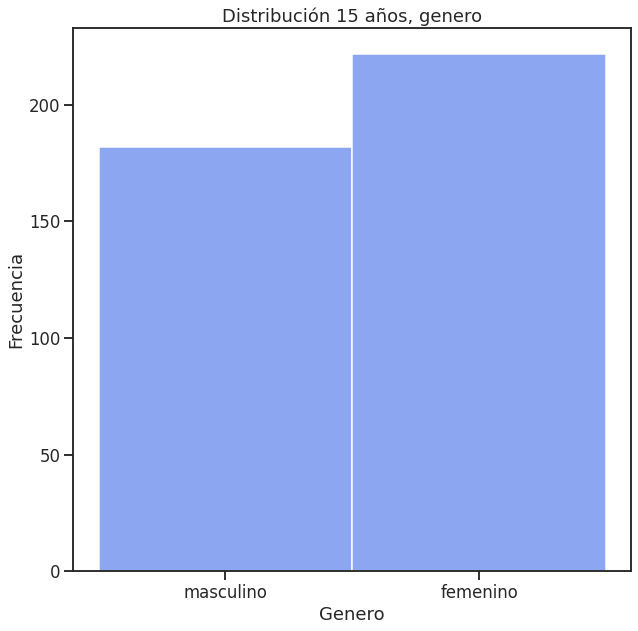

In [34]:
plt.figure(figsize=(10,10))

sns.set_palette("coolwarm")
sns.set_style("ticks")
sns.set_context("talk")


sns.histplot(chihuahua[(chihuahua["edad"] == 15)].sexo,discrete='True')

plt.title('Distribución 15 años, genero')
plt.xlabel('Genero')
plt.ylabel('Frecuencia')

plt.show()

In [35]:
chihuahua[(chihuahua["edad"] == 15) & (chihuahua["sexo"] == "femenino")].vivo_o_muerto.value_counts()

vivo                 200
aun_sin_localizar     20
muerto                 2
Name: vivo_o_muerto, dtype: int64

In [36]:
chihuahua[(chihuahua["edad"] == 15) & (chihuahua["sexo"] == "masculino")].vivo_o_muerto.value_counts()

vivo                 136
aun_sin_localizar     46
Name: vivo_o_muerto, dtype: int64

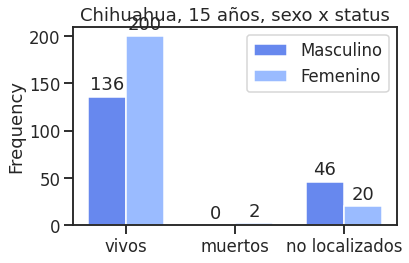

In [37]:
labels = ['vivos', 'muertos', 'no localizados']
men_means = [ 136,0,46]
women_means = [200, 2, 20]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Masculino')
rects2 = ax.bar(x + width/2, women_means, width, label='Femenino')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_title('Chihuahua, 15 años, sexo x status')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [38]:
chihuahua[(chihuahua["edad"] == 15) & (chihuahua["sexo"] == "femenino")].posible_causa_desaparicion.value_counts()

rebeldia                          130
disfuncion_familiar                19
otro                                5
se_fue_con_su_pareja                5
no_especificado                     4
independizarse                      3
evento_social                       3
se_fue_con_el_novio                 3
se_fue_a_casa_de_una_amiga          2
otros                               2
sin_dato                            2
declinado                           2
se_fue_a_una_fiestaconunaamiga      1
se_fue_con_su_novio                 1
en_casa_de_una_amiga                1
se_fue_con_su_amiga                 1
se_fue_con_su_pareja_sentiment      1
se_fue_con_una_amiga                1
se_fue_con_un_amigo                 1
se_fue_su_pareja                    1
se_fue_a_casa_de_una_señora         1
se_encontraba_con_unos_amigos       1
disfucion_familiar_rebeldia         1
estaba_con_una_amiga                1
se_fue_un_ranchito                  1
centro_de_rehabilitacion            1
homicidio   

In [39]:
chihuahua[(chihuahua["edad"] == 15) & (chihuahua["sexo"] == "masculino")].posible_causa_desaparicion.value_counts()

sin_dato                                                                                                                                                                                                                                                                  10
regreso_al_domicilio                                                                                                                                                                                                                                                       7
vagancia                                                                                                                                                                                                                                                                   5
no_especificado                                                                                                                                                                                  

In [40]:
chihuahua[(chihuahua["edad"]==15)].ocupacion.value_counts()

no_especificado        248
estudiante              64
sin_dato                31
desempleado             19
empleado_particular      9
otros                    4
jornalero                2
obrero                   2
lavacoches               1
comerciante              1
ama_de_casa              1
Name: ocupacion, dtype: int64

In [41]:
chihuahua[(chihuahua["edad"] == 15) & (chihuahua["sexo"] == "masculino")].relacion_con_grupos_delictivos.value_counts()

no    156
si     26
Name: relacion_con_grupos_delictivos, dtype: int64

In [42]:
chihuahua[(chihuahua["edad"] == 15) & (chihuahua["sexo"] == "femenino")].relacion_con_grupos_delictivos.value_counts()

no    182
si     40
Name: relacion_con_grupos_delictivos, dtype: int64

Recordemos hay 222 femeninos, de los cuales 40 tenían relación con grupos delictivos, tomando 22 como el 100%, entonces el 18% de las mujeres de 15 años desaparecidas en Chihuahua tenían relación con grupos delictivos  
Si masculinos son 182, de los cuales 26 tenían relación con grupos delictivos, tomando 182 como el 100%, entonces el 14.2% de los hombres de 15 años desparecidos en Chihuahua tenían relación con grupos delictivos

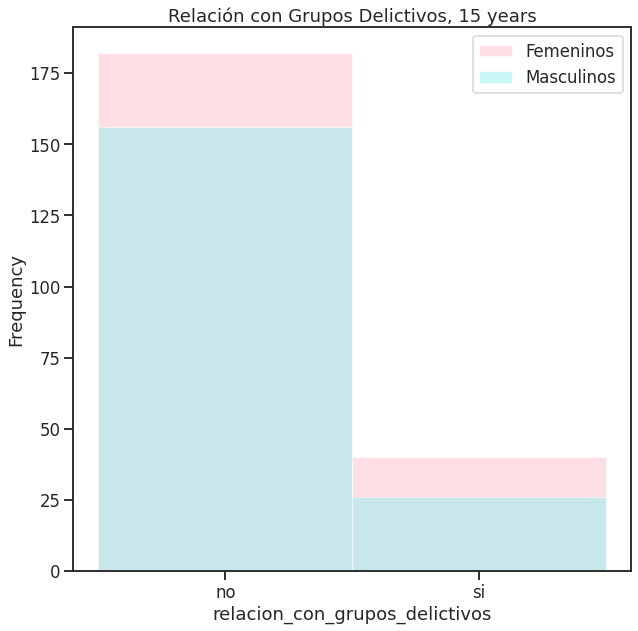

In [43]:
plt.figure(figsize=(10,10))

sns.set_style("ticks")
sns.set_context("talk")

sns.histplot(chihuahua[(chihuahua["edad"] == 15) & (chihuahua["sexo"] == "femenino")].relacion_con_grupos_delictivos, label='Femeninos', alpha=0.8,linewidth=.5,color="#ffd6e0")
sns.histplot(chihuahua[(chihuahua["edad"] == 15) & (chihuahua["sexo"] == "masculino")].relacion_con_grupos_delictivos, label='Masculinos', alpha=0.5,linewidth=.5,color="#90f1ef")

plt.legend()

plt.ylabel('Frequency')
plt.title('Relación con Grupos Delictivos, 15 years')

plt.show()

In [44]:
chihuahua[(chihuahua["edad"] == 15 ) & (chihuahua["sexo"]== "femenino") & (chihuahua["vivo_o_muerto"] == "vivo")].estado_localizado.value_counts()

chihuahua          188
no_especificado      9
jalisco              1
sonora               1
nuevo_leon           1
Name: estado_localizado, dtype: int64

In [45]:
chihuahua[(chihuahua["edad"] == 15 ) & (chihuahua["sexo"]== "femenino") & (chihuahua["vivo_o_muerto"] == "muerto")].estado_localizado.value_counts()

chihuahua    2
Name: estado_localizado, dtype: int64

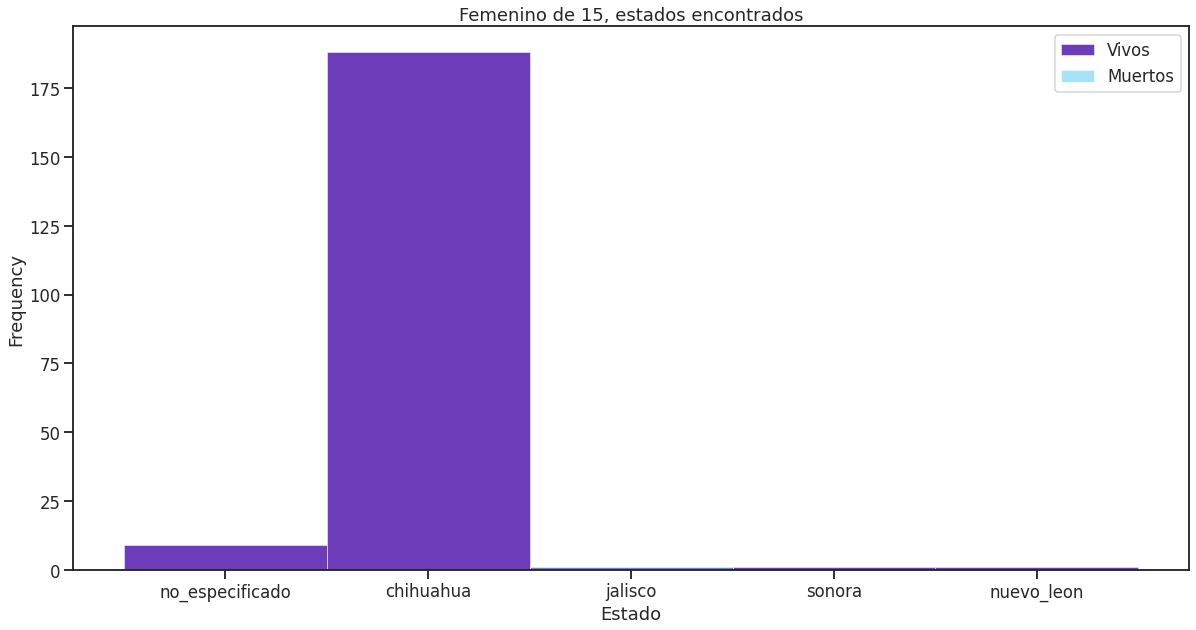

In [46]:
plt.figure(figsize=(20,10))

sns.set_style("ticks")
sns.set_context("talk")

sns.histplot(chihuahua[(chihuahua["edad"] == 15 ) & (chihuahua["sexo"]== "femenino") & (chihuahua["vivo_o_muerto"] == "vivo")].estado_localizado, label='Vivos', color="#480ca8", alpha=0.8,linewidth=.5,discrete="true")
sns.histplot(chihuahua[(chihuahua["edad"] == 15 ) & (chihuahua["sexo"]== "femenino") & (chihuahua["vivo_o_muerto"] == "muerto")].estado_localizado.value_counts(), label='Muertos', color="#4cc9f0",alpha=0.5,linewidth=.5,discrete="true")

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Estado')
plt.title('Femenino de 15, estados encontrados')

plt.show()

In [47]:
chihuahua[(chihuahua["edad"] == 15 ) & (chihuahua["sexo"]== "masculino") & (chihuahua["vivo_o_muerto"] == "vivo")].estado_localizado.value_counts()

chihuahua               122
no_especificado          10
distrito_federal          1
coahuila_de_zaragoza      1
veracruz                  1
texas                     1
Name: estado_localizado, dtype: int64

In [48]:
chihuahua[(chihuahua["edad"] == 15 ) & (chihuahua["sexo"]== "masculino") & (chihuahua["vivo_o_muerto"] == "muerto")].estado_localizado.value_counts()

Series([], Name: estado_localizado, dtype: int64)

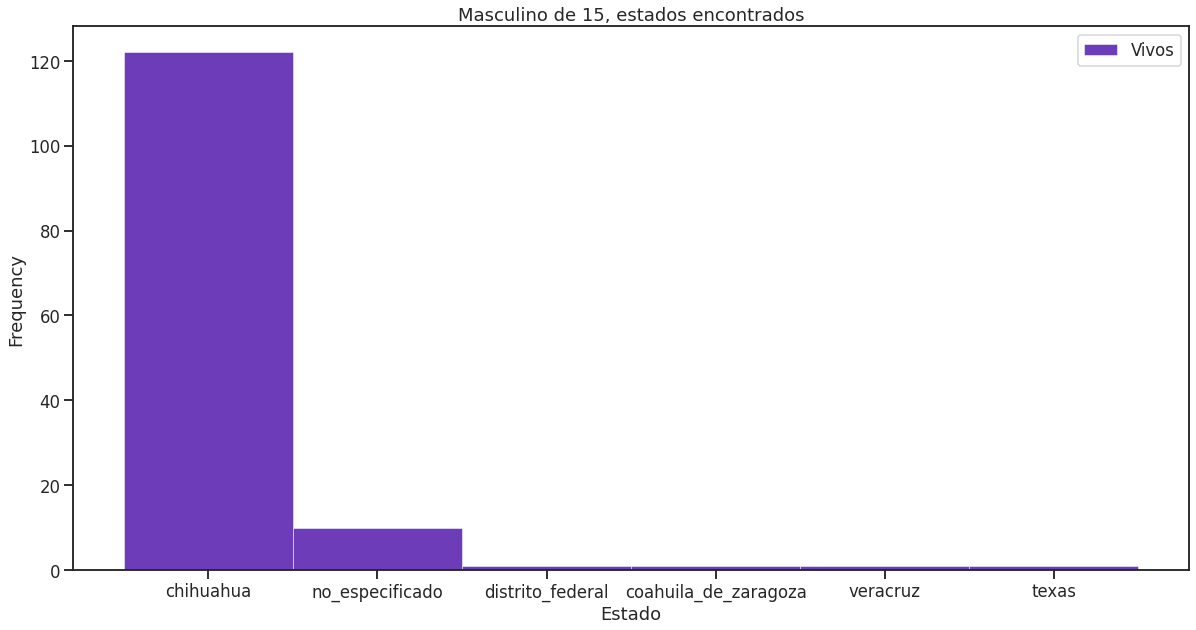

In [49]:
plt.figure(figsize=(20,10))

sns.set_style("ticks")
sns.set_context("talk")

sns.histplot(chihuahua[(chihuahua["edad"] == 15 ) & (chihuahua["sexo"]== "masculino") & (chihuahua["vivo_o_muerto"] == "vivo")].estado_localizado, label='Vivos', color="#480ca8", alpha=0.8,linewidth=.5,discrete="true")
sns.histplot(chihuahua[(chihuahua["edad"] == 15 ) & (chihuahua["sexo"]== "masculino") & (chihuahua["vivo_o_muerto"] == "muerto")].estado_localizado.value_counts(), label='Muertos', color="#4cc9f0",alpha=0.5,linewidth=.5,discrete="true")

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Estado')
plt.title('Masculino de 15, estados encontrados')

plt.show()

In [50]:
chihuahua[(chihuahua["edad"] == 15)].year_reporte.value_counts()

2015    143
2016    122
2014     35
2017     25
2011     21
2013     19
2009     11
2012     11
2010      6
2018      6
2008      3
2007      2
Name: year_reporte, dtype: int64

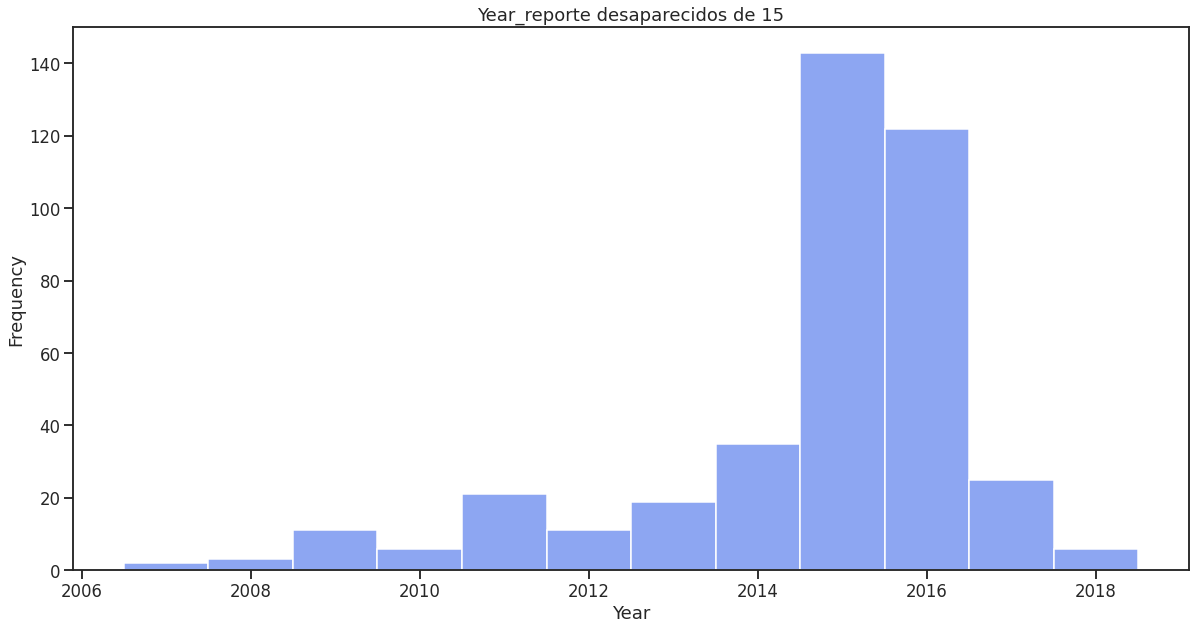

In [51]:
plt.figure(figsize=(20,10))

sns.set_style("ticks")
sns.set_context("talk")

sns.histplot(chihuahua[(chihuahua["edad"] == 15)].year_reporte,discrete="true")

plt.ylabel('Frequency')
plt.xlabel('Year')
plt.title('Year_reporte desaparecidos de 15')

plt.show()

In [52]:
chihuahua[(chihuahua["edad"] == 15)].dias_de_busqueda_reporte.describe()

count                               360
mean     -1406 days +03:07:45.488888896
std        2611 days 03:34:08.435094272
min                -6522 days +08:00:00
25%                 -263 days +20:07:15
50%                     0 days 06:45:30
75%                     5 days 22:08:45
max                  2427 days 01:50:00
Name: dias_de_busqueda_reporte, dtype: object

In [53]:
chihuahua[(chihuahua["edad"] == 15)].dias_de_busqueda_reporte.value_counts().head(10)

0 days 00:00:00         8
-5992 days +00:00:00    3
-6047 days +00:00:00    3
-6077 days +00:00:00    3
-5964 days +00:00:00    3
-5978 days +00:00:00    3
-1 days +17:16:00       2
-5880 days +00:00:00    2
-5669 days +00:36:00    2
-6017 days +00:00:00    2
Name: dias_de_busqueda_reporte, dtype: int64

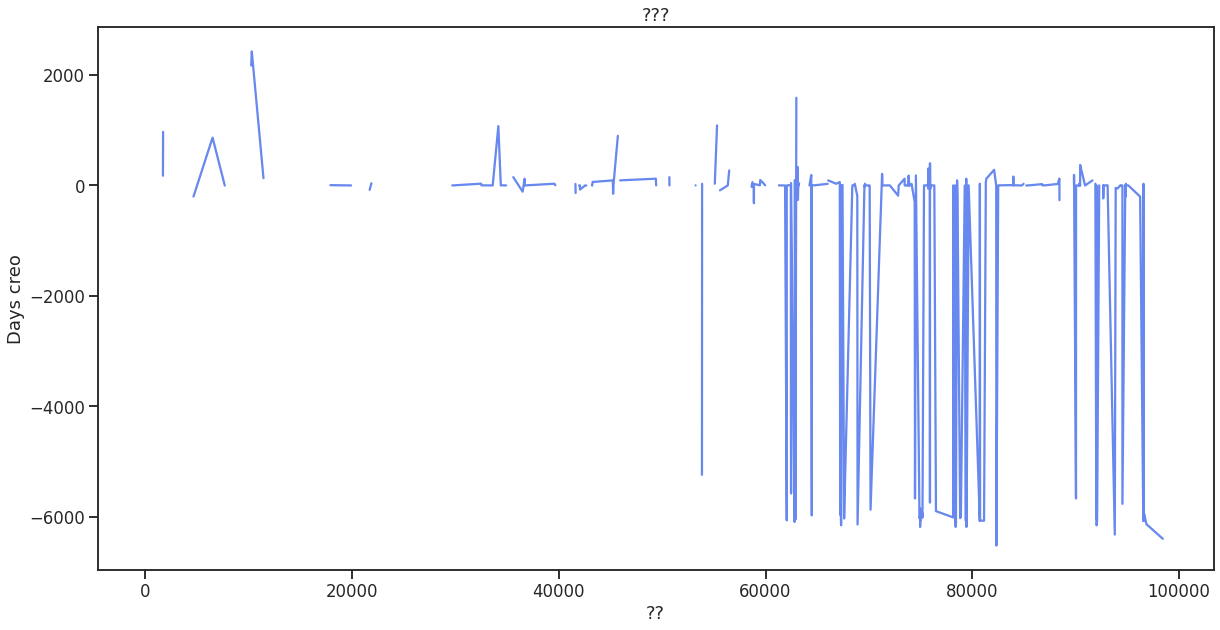

In [54]:
plt.figure(figsize=(20,10))

chihuahua[(chihuahua["edad"] == 15)].dias_de_busqueda_reporte.astype('timedelta64[D]').plot.line()

plt.ylabel('Days creo')
plt.xlabel('??')
plt.title('???')

plt.show()

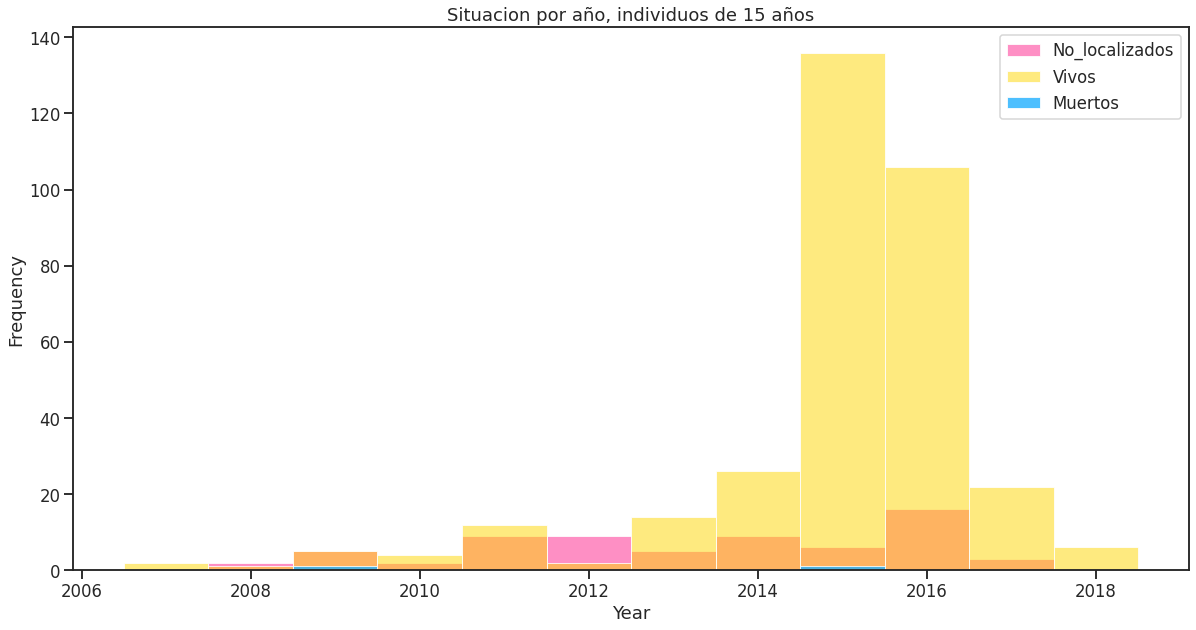

In [55]:
plt.figure(figsize=(20,10))

sns.set_style("ticks")
sns.set_context("talk")

sns.histplot(chihuahua[(chihuahua["vivo_o_muerto"] == "aun_sin_localizar" ) & (chihuahua["edad"] == 15)].year_reporte, label='No_localizados', alpha=0.5,linewidth=.8,discrete="true",color="#fe218b")
sns.histplot(chihuahua[(chihuahua["vivo_o_muerto"] == "vivo" ) & (chihuahua["edad"] == 15)].year_reporte,label='Vivos', alpha=0.5,linewidth=.8,discrete="true",color="#fed700")
sns.histplot(chihuahua[(chihuahua["vivo_o_muerto"] == "muerto" ) & (chihuahua["edad"] == 15)].year_reporte, label='Muertos', alpha=0.8,linewidth=.8,discrete="true", color="#21b0fe")

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Year')
plt.title('Situacion por año, individuos de 15 años')

plt.show()

## Vamos con los desaparecidos de 16 

In [56]:
chihuahua[(chihuahua["edad"] == 16)].sexo.value_counts()

masculino    206
femenino     175
Name: sexo, dtype: int64

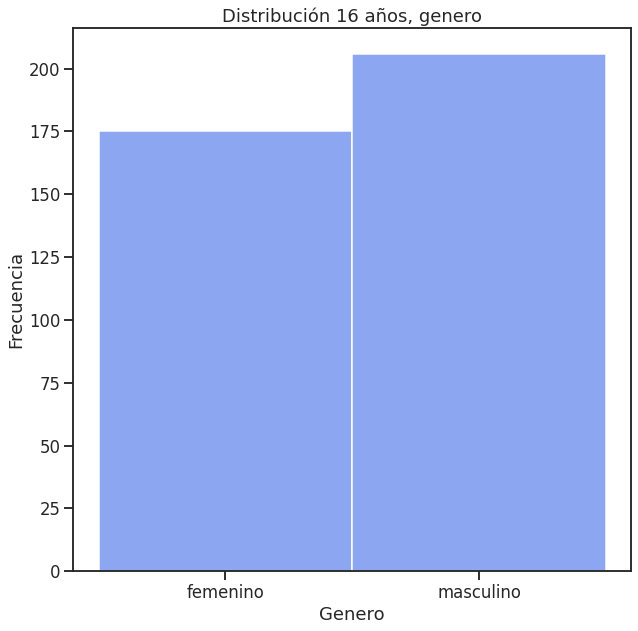

In [57]:
plt.figure(figsize=(10,10))

sns.set_palette("coolwarm")
sns.set_style("ticks")
sns.set_context("talk")


sns.histplot(chihuahua[(chihuahua["edad"] == 16)].sexo,discrete='True')

plt.title('Distribución 16 años, genero')
plt.xlabel('Genero')
plt.ylabel('Frecuencia')

plt.show()

In [58]:
chihuahua[(chihuahua["edad"] == 16) & (chihuahua["sexo"] == "femenino")].vivo_o_muerto.value_counts()

vivo                 152
aun_sin_localizar     23
Name: vivo_o_muerto, dtype: int64

In [59]:
chihuahua[(chihuahua["edad"] == 16) & (chihuahua["sexo"] == "masculino")].vivo_o_muerto.value_counts()

vivo                 136
aun_sin_localizar     65
muerto                 5
Name: vivo_o_muerto, dtype: int64

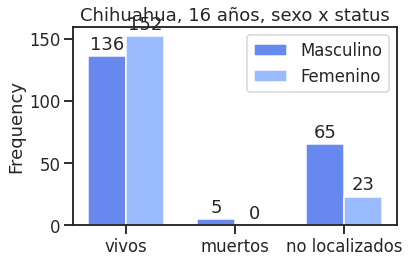

In [60]:
labels = ['vivos', 'muertos', 'no localizados']
men_means = [ 136,5,65]
women_means = [152, 0, 23]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Masculino')
rects2 = ax.bar(x + width/2, women_means, width, label='Femenino')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_title('Chihuahua, 16 años, sexo x status')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [61]:
chihuahua[(chihuahua["edad"] == 16) & (chihuahua["sexo"] == "femenino")].posible_causa_desaparicion.value_counts()

rebeldia                                                                                           87
se_fue_con_su_pareja                                                                               10
disfuncion_familiar                                                                                 9
otro                                                                                                7
se_fue_con_su_novio                                                                                 4
independizarse                                                                                      4
desintegracion                                                                                      3
se_fue_con_una_amiga                                                                                3
se_fue_a_casa_de_una_amiga                                                                          2
no_especificado                                                                   

In [62]:
chihuahua[(chihuahua["edad"] == 16) & (chihuahua["sexo"] == "masculino")].posible_causa_desaparicion.value_counts()

sin_dato                                                                                        9
regreso_al_domicilio                                                                            5
rebeldia                                                                                        5
no_especificado                                                                                 4
problemas_familiares                                                                            2
                                                                                               ..
se_encontraba_con_un_amigo_regreso_al_domicilio                                                 1
regreso_al_domicilio_habia_estado_detenido_en_estacion_delicias                                 1
regreso_al_domilio_andaba_con_sus_amigos                                                        1
se_fugo_del_centro_de_rehabilitacion                                                            1
se_encuentra_detenid

In [63]:
chihuahua[(chihuahua["edad"] == 16) & (chihuahua["sexo"] == "femenino")].relacion_con_grupos_delictivos.value_counts()

no    140
si     35
Name: relacion_con_grupos_delictivos, dtype: int64

In [64]:
chihuahua[(chihuahua["edad"] == 16) & (chihuahua["sexo"] == "masculino")].relacion_con_grupos_delictivos.value_counts()

no    178
si     28
Name: relacion_con_grupos_delictivos, dtype: int64

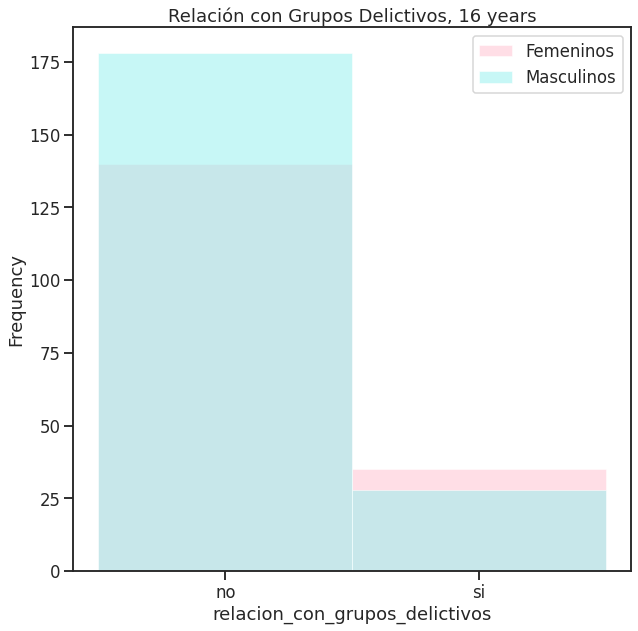

In [65]:
plt.figure(figsize=(10,10))

sns.set_style("ticks")
sns.set_context("talk")

sns.histplot(chihuahua[(chihuahua["edad"] == 16) & (chihuahua["sexo"] == "femenino")].relacion_con_grupos_delictivos, label='Femeninos', alpha=0.8,linewidth=.5,color="#ffd6e0")
sns.histplot(chihuahua[(chihuahua["edad"] == 16) & (chihuahua["sexo"] == "masculino")].relacion_con_grupos_delictivos, label='Masculinos', alpha=0.5,linewidth=.5,color="#90f1ef")

plt.legend()

plt.ylabel('Frequency')
plt.title('Relación con Grupos Delictivos, 16 years')

plt.show()

recordamos que hay un total de 381 desaparecidos de 16 años  
Hay 206 hombres, de los cuales 28 estan registrados con relacion con grupos delictivos, es decir, si 206 es el 100%, entonces el 13% tenian relacion con grupos delictivos  
Hay 175 mujeres, de las cuales 35 estan registradas con relacion con grupos delictivos, es decir, si 175 es el 100%, entonces el 20% tenian relacion con grupos delictivos  
Ahora, si tomamos 381 como el total de 16 años, entonces el 16.5% tenia relacion con grupos delictivos

In [66]:
chihuahua[(chihuahua["edad"]==16)].ocupacion.value_counts()

no_especificado        204
estudiante              65
desempleado             35
sin_dato                34
empleado_particular      9
jornalero                3
otros                    3
ama_de_casa              2
albañil                  2
obrero                   1
Name: ocupacion, dtype: int64

In [67]:
chihuahua[(chihuahua["edad"] == 16 ) & (chihuahua["sexo"]== "femenino") & (chihuahua["vivo_o_muerto"] == "vivo")].estado_localizado.value_counts()

chihuahua          147
no_especificado      2
zacatecas            2
guanajuato           1
Name: estado_localizado, dtype: int64

In [68]:
chihuahua[(chihuahua["edad"] == 16 ) & (chihuahua["sexo"]== "femenino") & (chihuahua["vivo_o_muerto"] == "vivo")].dias_de_busqueda_reporte.value_counts().head(10)

-5992 days +00:00:00    7
0 days 00:00:00         5
-6077 days +00:00:00    3
-5969 days +00:00:00    3
-6013 days +00:00:00    3
365 days 00:00:00       2
-6078 days +00:00:00    2
366 days 00:00:00       2
-5964 days +00:00:00    2
-1 days +20:10:00       2
Name: dias_de_busqueda_reporte, dtype: int64

In [69]:
chihuahua[(chihuahua["edad"] == 16 ) & (chihuahua["sexo"]== "femenino") & (chihuahua["vivo_o_muerto"] == "vivo")].dias_de_busqueda_evento.value_counts().head(10)

0 days 00:00:00         5
-5986 days +00:00:00    2
-6071 days +00:00:00    2
368 days 00:00:00       2
-5985 days +00:00:00    2
-6185 days +00:00:00    1
-6044 days +21:54:00    1
-6047 days +13:43:00    1
-5850 days +00:00:00    1
-5960 days +00:00:00    1
Name: dias_de_busqueda_evento, dtype: int64

In [70]:
chihuahua[(chihuahua["edad"] == 16 ) & (chihuahua["sexo"]== "masculino") & (chihuahua["vivo_o_muerto"] == "vivo")].estado_localizado.value_counts()

chihuahua               123
no_especificado           8
coahuila_de_zaragoza      1
durango                   1
baja_california           1
texas                     1
guanajuato                1
Name: estado_localizado, dtype: int64

In [71]:
chihuahua[(chihuahua["edad"] == 16 ) & (chihuahua["sexo"]== "masculino") & (chihuahua["vivo_o_muerto"] == "muerto")].estado_localizado.value_counts()

chihuahua    5
Name: estado_localizado, dtype: int64

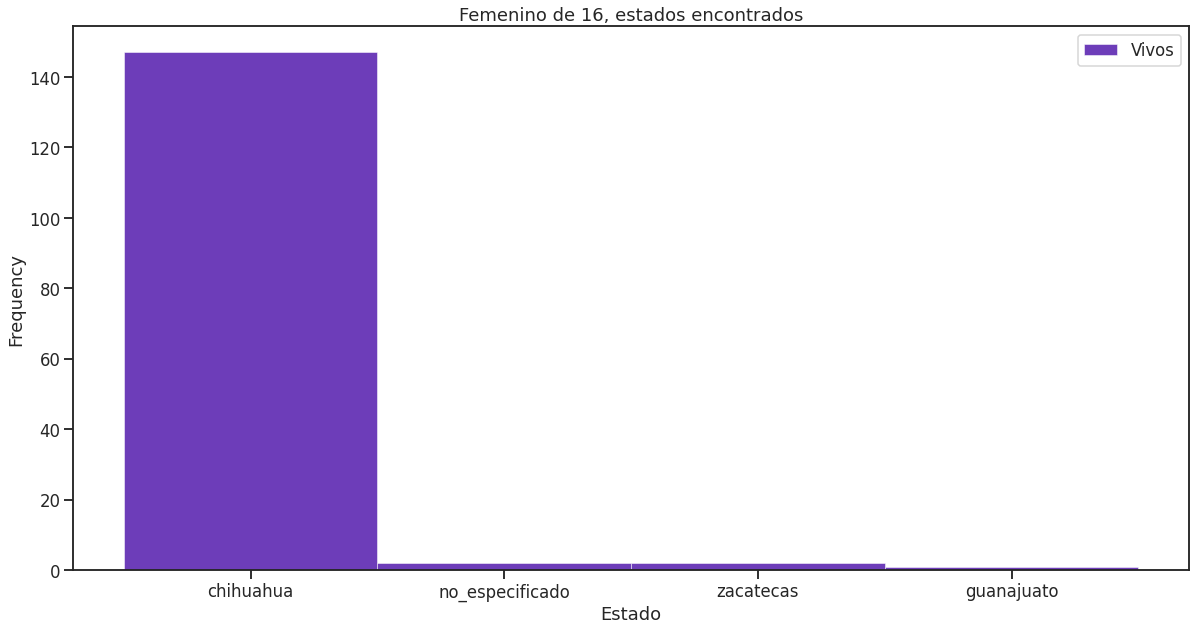

In [72]:
plt.figure(figsize=(20,10))

sns.set_style("ticks")
sns.set_context("talk")

sns.histplot(chihuahua[(chihuahua["edad"] == 16 ) & (chihuahua["sexo"]== "femenino") & (chihuahua["vivo_o_muerto"] == "vivo")].estado_localizado, label='Vivos', color="#480ca8", alpha=0.8,linewidth=.5,discrete="true")
sns.histplot(chihuahua[(chihuahua["edad"] == 16 ) & (chihuahua["sexo"]== "femenino") & (chihuahua["vivo_o_muerto"] == "muerto")].estado_localizado.value_counts(), label='Muertos', color="#4cc9f0",alpha=0.5,linewidth=.5,discrete="true")

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Estado')
plt.title('Femenino de 16, estados encontrados')

plt.show()

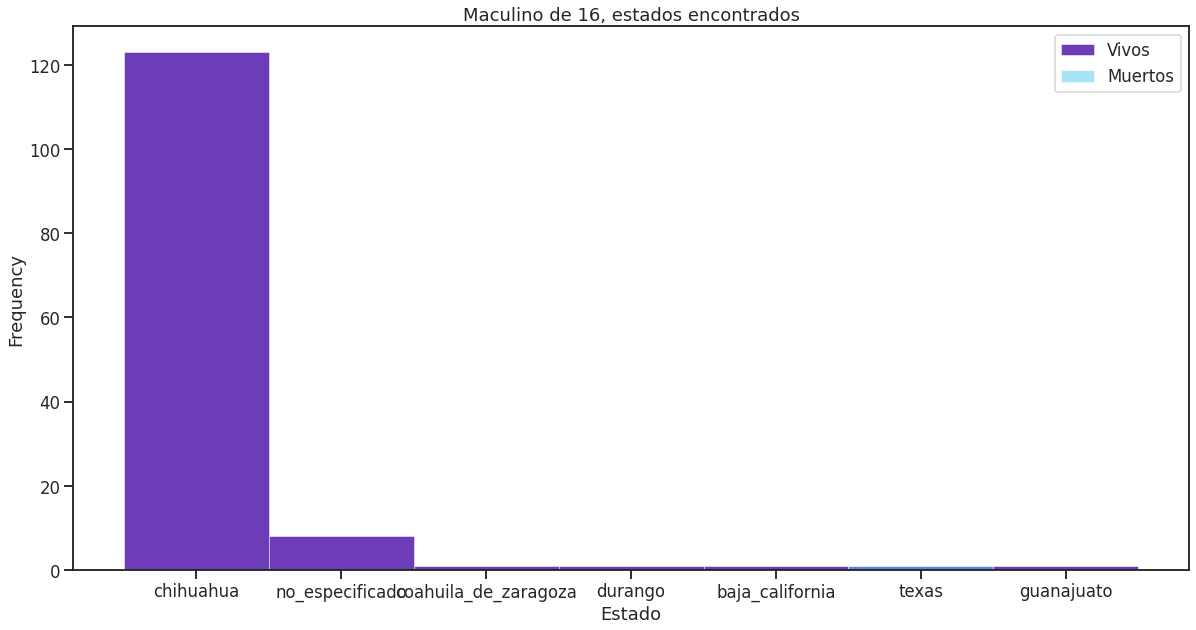

In [73]:
plt.figure(figsize=(20,10))

sns.set_style("ticks")
sns.set_context("talk")

sns.histplot(chihuahua[(chihuahua["edad"] == 16 ) & (chihuahua["sexo"]== "masculino") & (chihuahua["vivo_o_muerto"] == "vivo")].estado_localizado, label='Vivos', color="#480ca8", alpha=0.8,linewidth=.5,discrete="true")
sns.histplot(chihuahua[(chihuahua["edad"] == 16 ) & (chihuahua["sexo"]== "masculino") & (chihuahua["vivo_o_muerto"] == "muerto")].estado_localizado.value_counts(), label='Muertos', color="#4cc9f0",alpha=0.5,linewidth=.5,discrete="true")

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Estado')
plt.title('Maculino de 16, estados encontrados')

plt.show()

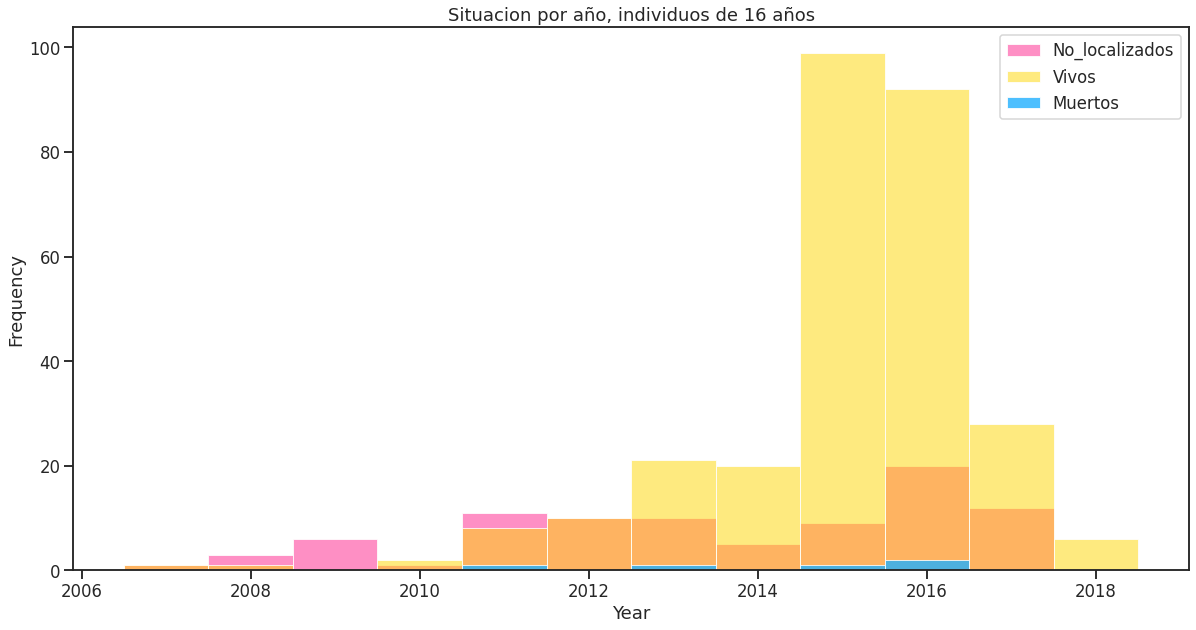

In [74]:
plt.figure(figsize=(20,10))

sns.set_style("ticks")
sns.set_context("talk")

sns.histplot(chihuahua[(chihuahua["vivo_o_muerto"] == "aun_sin_localizar" ) & (chihuahua["edad"] == 16)].year_reporte, label='No_localizados', alpha=0.5,linewidth=.8,discrete="true",color="#fe218b")
sns.histplot(chihuahua[(chihuahua["vivo_o_muerto"] == "vivo" ) & (chihuahua["edad"] == 16)].year_reporte,label='Vivos', alpha=0.5,linewidth=.8,discrete="true",color="#fed700")
sns.histplot(chihuahua[(chihuahua["vivo_o_muerto"] == "muerto" ) & (chihuahua["edad"] == 16)].year_reporte, label='Muertos', alpha=0.8,linewidth=.8,discrete="true", color="#21b0fe")

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Year')
plt.title('Situacion por año, individuos de 16 años')

plt.show()

## 17 años

In [75]:
chihuahua[(chihuahua["edad"] == 17)].sexo.value_counts()

masculino    174
femenino     114
Name: sexo, dtype: int64

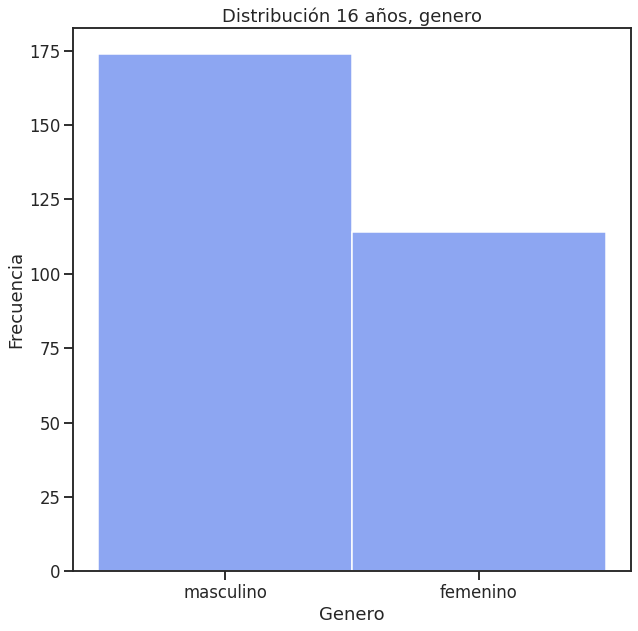

In [76]:
plt.figure(figsize=(10,10))

sns.set_palette("coolwarm")
sns.set_style("ticks")
sns.set_context("talk")


sns.histplot(chihuahua[(chihuahua["edad"] == 17)].sexo,discrete='True')

plt.title('Distribución 16 años, genero')
plt.xlabel('Genero')
plt.ylabel('Frecuencia')

plt.show()

In [77]:
chihuahua[(chihuahua["edad"] == 17) & (chihuahua["sexo"] == "femenino")].vivo_o_muerto.value_counts()

vivo                 95
aun_sin_localizar    16
muerto                3
Name: vivo_o_muerto, dtype: int64

In [78]:
chihuahua[(chihuahua["edad"] == 17) & (chihuahua["sexo"] == "masculino")].vivo_o_muerto.value_counts()

vivo                 103
aun_sin_localizar     61
muerto                10
Name: vivo_o_muerto, dtype: int64

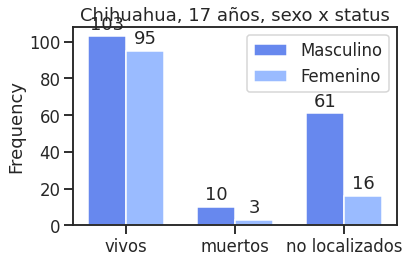

In [79]:
labels = ['vivos', 'muertos', 'no localizados']
men_means = [ 103,10,61]
women_means = [95, 3, 16]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Masculino')
rects2 = ax.bar(x + width/2, women_means, width, label='Femenino')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_title('Chihuahua, 17 años, sexo x status')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [80]:
chihuahua[(chihuahua["edad"] == 17) & (chihuahua["sexo"] == "femenino")].posible_causa_desaparicion.value_counts()

rebeldia                                                            58
no_especificado                                                      6
disfuncion_familiar                                                  4
evento_social                                                        3
independizarse                                                       3
homicidio                                                            2
otros                                                                2
se_fue_con_su_amiga                                                  2
se_encuentra_detenida_en_paso                                        1
se_fue_a_casa_de_una_amiga                                           1
se_fue_con_una_amiga                                                 1
se_encontraba_con_su_prima                                           1
se_quedo_de_ver_con_amigo                                            1
se_fue_a_casa_de_su_novio                                            1
salio_

In [81]:
chihuahua[(chihuahua["edad"] == 17) & (chihuahua["sexo"] == "masculino")].posible_causa_desaparicion.value_counts()

no_especificado                                                                                                                  6
sin_dato                                                                                                                         4
regreso_al_domicilio                                                                                                             4
problemas_familiares                                                                                                             3
rebeldia                                                                                                                         3
-1                                                                                                                               3
fuga_de_casa_hogar                                                                                                               2
vagancia                                                                           

In [82]:
chihuahua[(chihuahua["edad"] == 17) & (chihuahua["sexo"] == "femenino")].relacion_con_grupos_delictivos.value_counts()

no    96
si    18
Name: relacion_con_grupos_delictivos, dtype: int64

In [83]:
chihuahua[(chihuahua["edad"] == 17) & (chihuahua["sexo"] == "masculino")].relacion_con_grupos_delictivos.value_counts()

no    156
si     18
Name: relacion_con_grupos_delictivos, dtype: int64

Recordamos que en total hay 288 desaparecidos de 17, de los cuales:  
Masculinos son 174, si tomamos 174 como el 100%, entonces el 10.34% tenian relacion con grupos delictivos   
Femeninos 114, si tomamos 114 como el 100%, entonces, el 15.78% tenian relacion con grupos delictivos  
Ahora, del total de 17, el 100% es 288, entonces, el 12.5 % tenian relacion con grupos delictivos

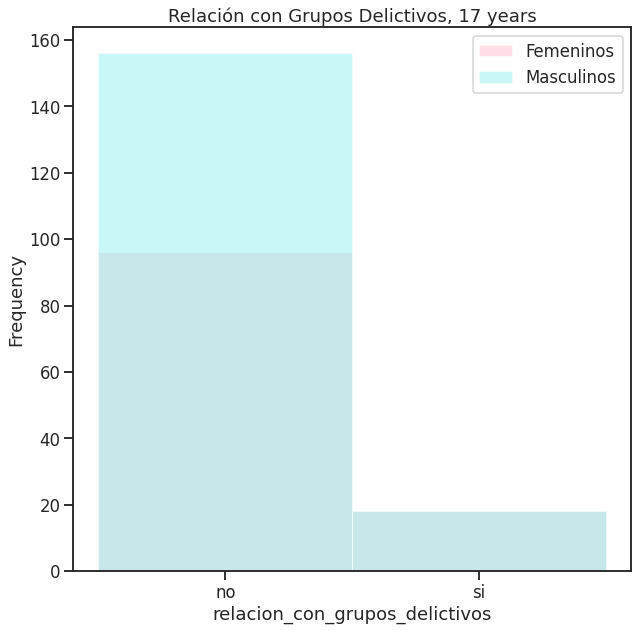

In [84]:
plt.figure(figsize=(10,10))

sns.set_style("ticks")
sns.set_context("talk")

sns.histplot(chihuahua[(chihuahua["edad"] == 17) & (chihuahua["sexo"] == "femenino")].relacion_con_grupos_delictivos, label='Femeninos', alpha=0.8,linewidth=.5,color="#ffd6e0")
sns.histplot(chihuahua[(chihuahua["edad"] == 17) & (chihuahua["sexo"] == "masculino")].relacion_con_grupos_delictivos, label='Masculinos', alpha=0.5,linewidth=.5,color="#90f1ef")

plt.legend()

plt.ylabel('Frequency')
plt.title('Relación con Grupos Delictivos, 17 years')

plt.show()

In [85]:
chihuahua[(chihuahua["edad"]==17)].ocupacion.value_counts()

no_especificado        159
estudiante              38
desempleado             30
sin_dato                27
empleado_particular      9
jornalero                5
ama_de_casa              3
otros                    2
albañil                  1
obrero                   1
Name: ocupacion, dtype: int64

In [86]:
chihuahua[(chihuahua["edad"] == 17 ) & (chihuahua["sexo"]== "femenino") & (chihuahua["vivo_o_muerto"] == "vivo")].estado_localizado.value_counts()

chihuahua          87
no_especificado     8
Name: estado_localizado, dtype: int64

In [87]:
chihuahua[(chihuahua["edad"] == 17 ) & (chihuahua["sexo"]== "femenino") & (chihuahua["vivo_o_muerto"] == "muerto")].estado_localizado.value_counts()

chihuahua    3
Name: estado_localizado, dtype: int64

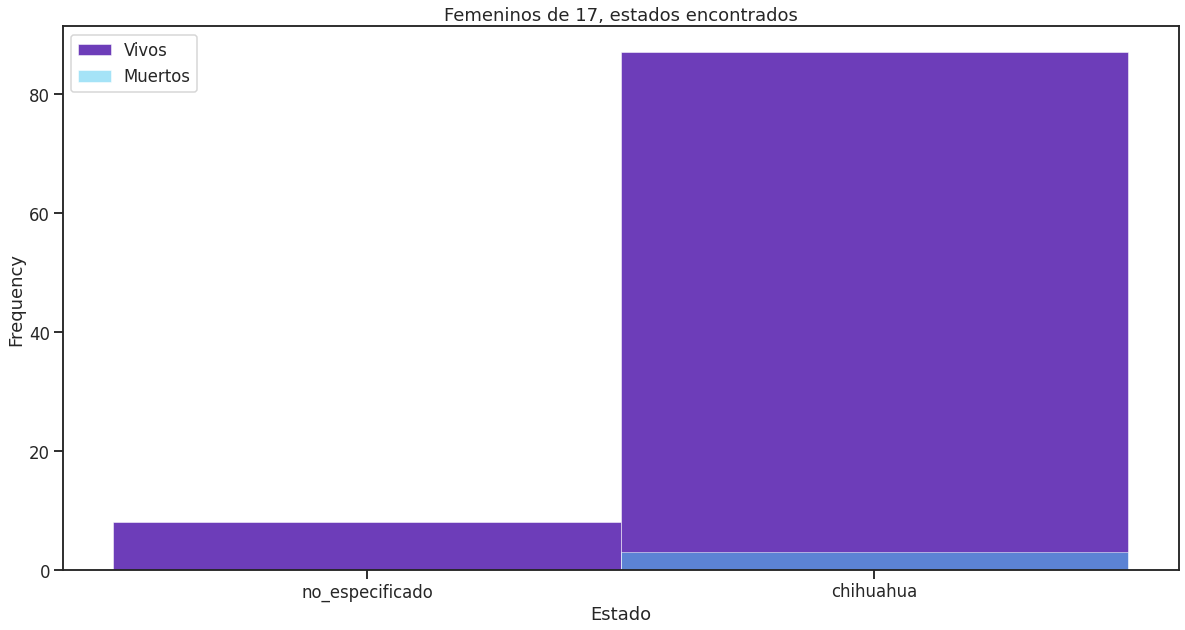

In [88]:
plt.figure(figsize=(20,10))

sns.set_style("ticks")
sns.set_context("talk")

sns.histplot(chihuahua[(chihuahua["edad"] == 17 ) & (chihuahua["sexo"]== "femenino") & (chihuahua["vivo_o_muerto"] == "vivo")].estado_localizado, label='Vivos', color="#480ca8", alpha=0.8,linewidth=.5,discrete="true")
sns.histplot(chihuahua[(chihuahua["edad"] == 17 ) & (chihuahua["sexo"]== "femenino") & (chihuahua["vivo_o_muerto"] == "muerto")].estado_localizado, label='Muertos', color="#4cc9f0",alpha=0.5,linewidth=.5,discrete="true")

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Estado')
plt.title('Femeninos de 17, estados encontrados')

plt.show()

In [89]:
chihuahua[(chihuahua["edad"] == 17 ) & (chihuahua["sexo"]== "masculino") & (chihuahua["vivo_o_muerto"] == "vivo")].estado_localizado.value_counts()

chihuahua          89
no_especificado    13
texas               1
Name: estado_localizado, dtype: int64

In [90]:
chihuahua[(chihuahua["edad"] == 17 ) & (chihuahua["sexo"]== "masculino") & (chihuahua["vivo_o_muerto"] == "muerto")].estado_localizado.value_counts()

chihuahua          9
no_especificado    1
Name: estado_localizado, dtype: int64

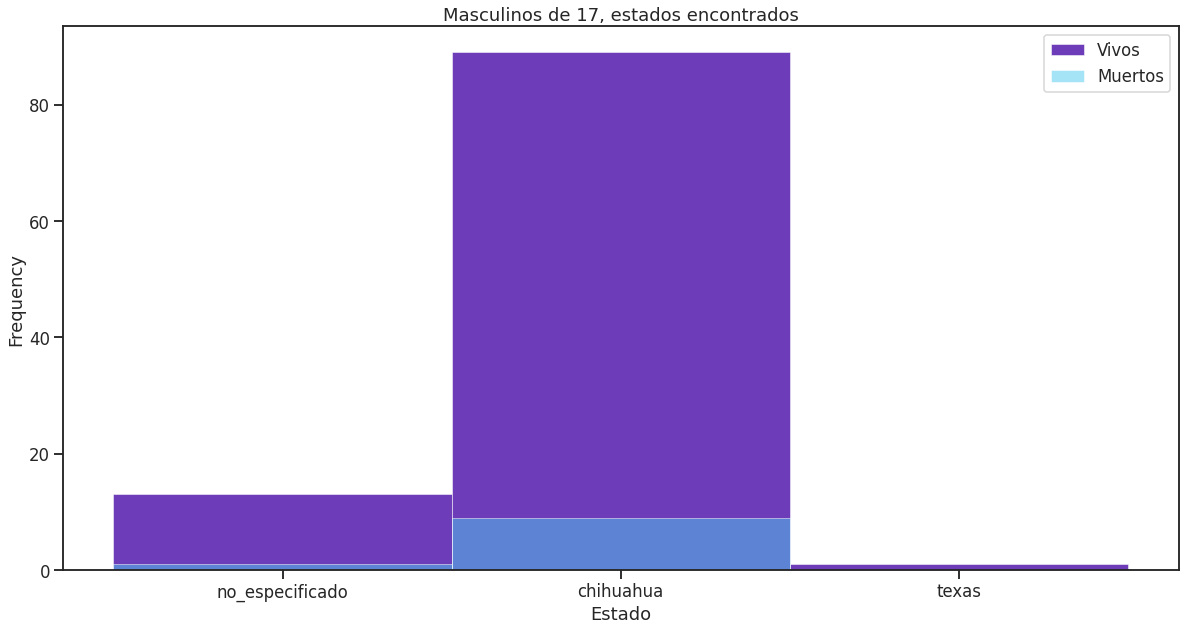

In [91]:
plt.figure(figsize=(20,10))

sns.set_style("ticks")
sns.set_context("talk")

sns.histplot(chihuahua[(chihuahua["edad"] == 17 ) & (chihuahua["sexo"]== "masculino") & (chihuahua["vivo_o_muerto"] == "vivo")].estado_localizado, label='Vivos', color="#480ca8", alpha=0.8,linewidth=.5,discrete="true")
sns.histplot(chihuahua[(chihuahua["edad"] == 17 ) & (chihuahua["sexo"]== "masculino") & (chihuahua["vivo_o_muerto"] == "muerto")].estado_localizado, label='Muertos', color="#4cc9f0",alpha=0.5,linewidth=.5,discrete="true")

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Estado')
plt.title('Masculinos de 17, estados encontrados')

plt.show()

In [92]:
list(chihuahua[(chihuahua["edad"] == 17 ) & (chihuahua["estado_localizado"]== "texas") & (chihuahua["vivo_o_muerto"] == "vivo")]["posible_causa_desaparicion"])

['se_encuentra_en_los_estados_unidos_se_cruzo_con_un_amigo_para_alla']

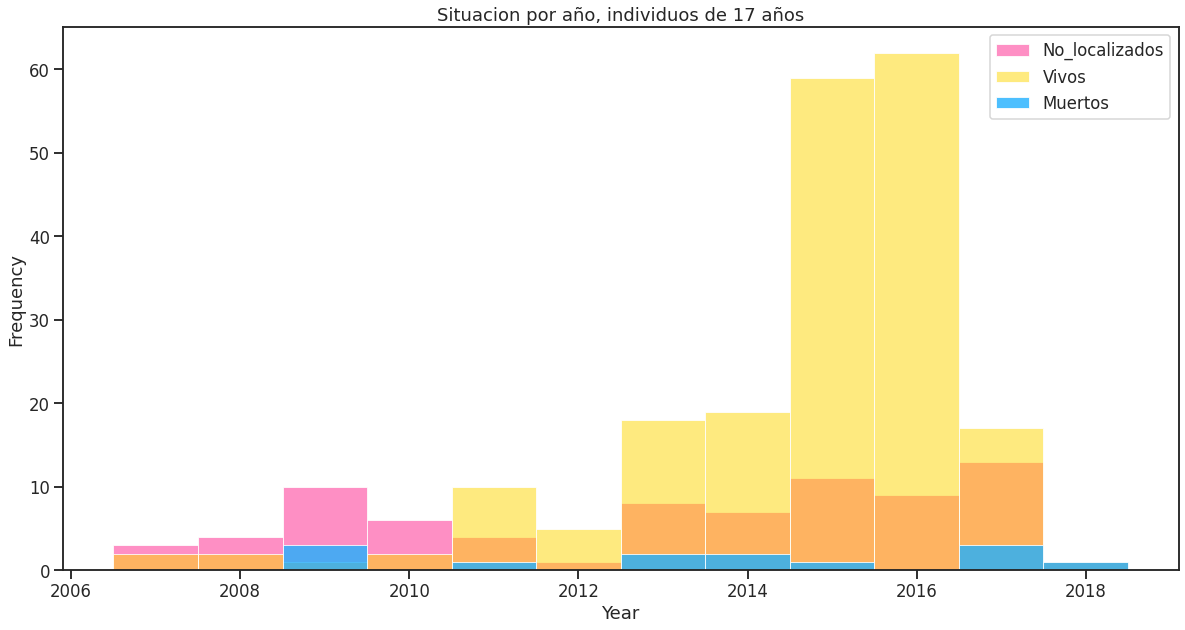

In [93]:
plt.figure(figsize=(20,10))

sns.set_style("ticks")
sns.set_context("talk")

sns.histplot(chihuahua[(chihuahua["vivo_o_muerto"] == "aun_sin_localizar" ) & (chihuahua["edad"] == 17)].year_reporte, label='No_localizados', alpha=0.5,linewidth=.8,discrete="true",color="#fe218b")
sns.histplot(chihuahua[(chihuahua["vivo_o_muerto"] == "vivo" ) & (chihuahua["edad"] == 17)].year_reporte,label='Vivos', alpha=0.5,linewidth=.8,discrete="true",color="#fed700")
sns.histplot(chihuahua[(chihuahua["vivo_o_muerto"] == "muerto" ) & (chihuahua["edad"] == 17)].year_reporte, label='Muertos', alpha=0.8,linewidth=.8,discrete="true", color="#21b0fe")

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Year')
plt.title('Situacion por año, individuos de 17 años')

plt.show()

# Vamos a ver en general como está la situación de localizados y no localizados en Chihuahua

In [94]:
chihuahua.year_reporte.value_counts()

2015    1283
2016    1165
2017     672
2014     654
2013     569
2011     373
2012     368
2010     255
2009     175
2008     130
2007      99
2018      91
2006       2
Name: year_reporte, dtype: int64

In [95]:
chihuahua[(chihuahua["vivo_o_muerto"] == "vivo" )].year_reporte.value_counts()

2015    984
2016    833
2014    388
2017    376
2013    329
2011    117
2012    105
2010     57
2018     53
2009     25
2007     21
2008     19
2006      2
Name: year_reporte, dtype: int64

In [96]:
chihuahua[(chihuahua["vivo_o_muerto"] == "muerto" )].year_reporte.value_counts()

2015    53
2017    46
2016    41
2010    37
2014    34
2012    32
2013    32
2011    27
2018    13
2009    11
2008     9
2007     3
Name: year_reporte, dtype: int64

In [97]:
chihuahua[(chihuahua["vivo_o_muerto"] == "aun_sin_localizar" )].year_reporte.value_counts()

2016    291
2017    250
2015    246
2014    232
2012    231
2011    229
2013    208
2010    161
2009    139
2008    102
2007     75
2018     25
Name: year_reporte, dtype: int64

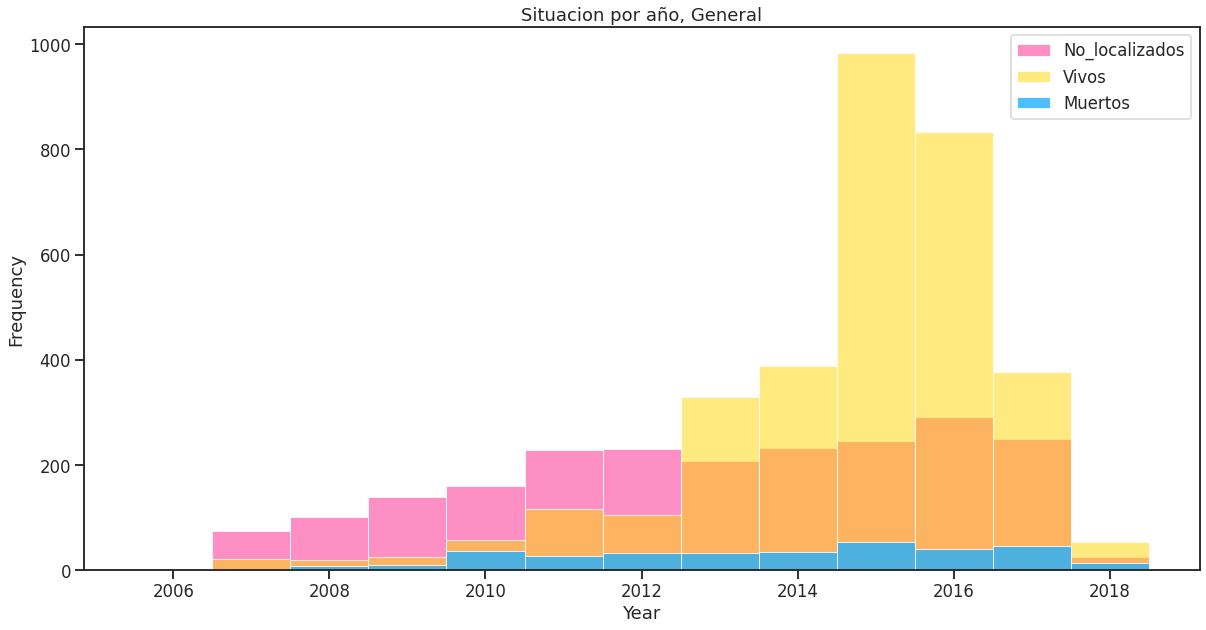

In [98]:
plt.figure(figsize=(20,10))

sns.set_style("ticks")
sns.set_context("talk")

sns.histplot(chihuahua[(chihuahua["vivo_o_muerto"] == "aun_sin_localizar" )].year_reporte, label='No_localizados', alpha=0.5,linewidth=.8,discrete="true",color="#fe218b")
sns.histplot(chihuahua[(chihuahua["vivo_o_muerto"] == "vivo" )].year_reporte,label='Vivos', alpha=0.5,linewidth=.8,discrete="true",color="#fed700")
sns.histplot(chihuahua[(chihuahua["vivo_o_muerto"] == "muerto" )].year_reporte, label='Muertos', alpha=0.8,linewidth=.8,discrete="true", color="#21b0fe")

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Year')
plt.title('Situacion por año, General')

plt.show()

In [99]:
chihuahua.estado_localizado.value_counts()

chihuahua               3151
no_especificado          543
texas                     28
durango                   17
coahuila_de_zaragoza      13
sonora                    10
sinaloa                    7
zacatecas                  6
distrito_federal           5
nuevo_leon                 4
jalisco                    4
nayarit                    3
baja_california            3
guanajuato                 3
chiapas                    2
veracruz                   2
puebla                     1
new_mexico                 1
queretaro                  1
tamaulipas                 1
estado_de_mexico           1
aguascalientes             1
Name: estado_localizado, dtype: int64

In [100]:
list(chihuahua[(chihuahua["estado_localizado"]== "texas")]["posible_causa_desaparicion"])

['internado_en_el_paso_texas',
 'se_encuentra_detenido_en_el_paso_texas',
 'se_encuentra_en_un_hospital_en_el_paso_texas',
 'x29en_el_condado_del_paso_texas',
 'se_encuentra_en_los_estados_unidos_se_cruzo_con_un_amigo_para_alla',
 'se_encuentra_detenido_en_el_condado_de_doña_anna',
 'se_encuentra_detenido_en_estados_unidos',
 'se_encuentra_detenido_en_estados_unidos',
 'se_encuentra_detenido_en_estados_unidos_de_norteamerica',
 'se_encuentra_detenido_en_estados_unidos',
 nan,
 'se_encuentra_en_el_paso_texas_con_un_tio',
 'esta_detenido_en_estados_unidos_por_tratar_de_cruzar_de_manera_ilegal',
 'se_encuentra_detenido_en_estados_unidos_por_tratar_de_cruzar_sin_documento_migratorio',
 'detendio_en_estados_unidos_de_norteamerica',
 'x29_por_tratar_de_cruzar_a_los_estados_unidos',
 'se_encuentra_en_el_paso_texas_en_proceso_de_asilo_politico',
 nan,
 'detenido_en_estados_unidos',
 'se_encuentra_detenido_en_estados_unidos_de_norteamerica',
 'se_encontraba_en_el_paso_texas_trabajando',
 'se_en

In [101]:
chihuahua[(chihuahua["estado_localizado"]== "texas")].year_reporte.value_counts()

2015    15
2014     9
2016     2
2012     1
2013     1
Name: year_reporte, dtype: int64

In [102]:
chihuahua[(chihuahua["vivo_o_muerto"] == "vivo" )].estado_localizado.value_counts()

chihuahua               2852
no_especificado          338
texas                     28
durango                   14
coahuila_de_zaragoza      13
sonora                    10
sinaloa                    7
zacatecas                  6
distrito_federal           5
nuevo_leon                 4
jalisco                    4
guanajuato                 3
baja_california            3
nayarit                    3
veracruz                   2
chiapas                    2
new_mexico                 1
puebla                     1
queretaro                  1
estado_de_mexico           1
aguascalientes             1
Name: estado_localizado, dtype: int64

In [103]:
chihuahua[(chihuahua["vivo_o_muerto"] == "muerto" )].estado_localizado.value_counts()

chihuahua          299
no_especificado     35
durango              3
tamaulipas           1
Name: estado_localizado, dtype: int64

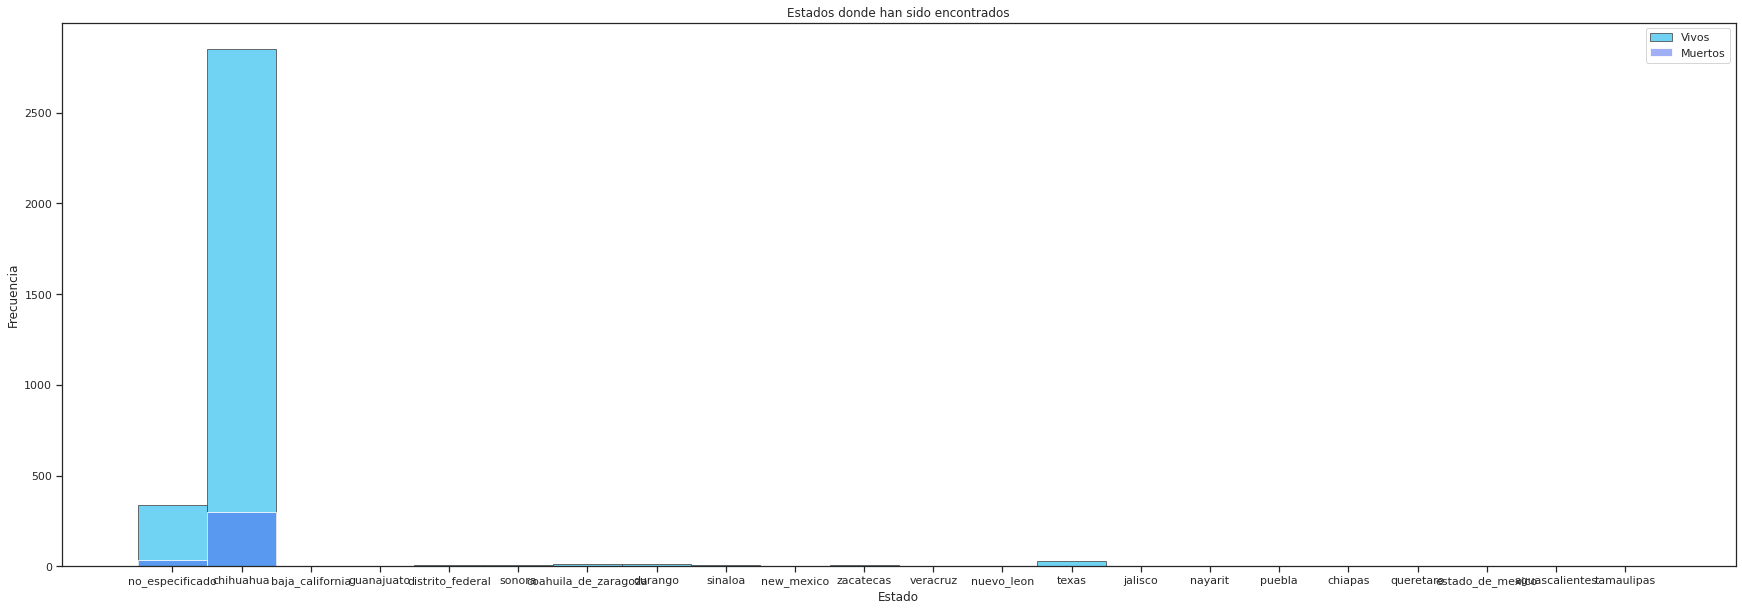

In [104]:
plt.figure(figsize=(30,10))

sns.set_style("ticks")
sns.set_context("notebook")

sns.histplot(chihuahua[(chihuahua["vivo_o_muerto"] == "vivo" )].estado_localizado, label='Vivos', color="#4cc9f0", alpha=0.8,edgecolor=".3",linewidth=.8)
sns.histplot(chihuahua[(chihuahua["vivo_o_muerto"] == "muerto" )].estado_localizado, label='Muertos', color="#4361ee", alpha=0.5,linewidth=.8)

plt.legend()

plt.ylabel('Frecuencia')
plt.xlabel('Estado')
plt.title('Estados donde han sido encontrados')

plt.show()